In [2]:
import os
os.chdir("C:/Users/zheng/Documents/Finance Research/")
import pandas as pd
import scipy
from datetime import timedelta
from Code.o2_vix import plt_event_dist, plt_contract, plt_contract_event, filter_events, filter_futures_data

- We want to see how VIX Futures and VIX premiums behave around macro announcements(Eg: FOMC) at the daily and intra-day frequency.
- For VIX Futures, we have data at a baseline of 5 minute interval
- For VIX Index, we have data at a baseline of 15 seconds starting from 15/10/2003



- Set up the dataframe of event dates

In [3]:
event_df = pd.read_csv("Data/macro/data/macro/macro_announcement_dates_202112.csv")
for col in event_df.columns:
    event_df[col] = pd.to_datetime(event_df[col], format="%m/%d/%Y")
fomc_time = "14:00:00"
event_df['New_FOMC'] =  pd.to_datetime(event_df["New_FOMC"].dt.strftime("%m/%d/%Y") + " " + fomc_time, format="%m/%d/%Y %H:%M:%S")
event_df.head(10)

,Unemployment Rate,Consumer Price Index,Producer Price Index,CFNAI,EIA,OPEC,IEA,Old_FOMC,New_FOMC,GDP Annualized Advanced,...,Factory Orders,New Home Sales,Personal Consumption,Monthly Budget Statement,Initial Jobless Claims,Chicago Purchasing Manager Index,U. Michigan Consumer Confidence P,U. Michigan Consumer Confidence F,Actual fed funds target rate FFTR,Inflation
0,1957-07-11,1953-02-27,1971-02-17,2001-03-05,2001-05-23,2001-01-19,1991-01-01,1936-03-19,1994-02-04 14:00:00,1968-01-16,...,1990-01-05,1990-01-03,1990-01-29,1990-02-22,1991-07-18,1996-11-27,1991-01-18,1991-02-01,1990-02-07,1980-02-15
1,1957-08-12,1953-03-26,1971-03-05,2001-04-03,2001-05-31,2001-02-20,1991-02-01,1936-05-25,1994-03-22 14:00:00,1968-04-17,...,1990-02-02,1990-01-31,1990-03-01,1990-03-21,1991-07-25,1996-12-31,1991-02-15,1991-03-01,1990-03-27,1980-03-07
2,1957-09-10,1953-04-22,1971-04-01,2001-05-02,2001-06-06,2001-03-22,1991-04-01,1936-11-20,1994-05-17 14:00:00,1968-07-18,...,1990-03-07,1990-03-02,1990-03-29,1990-04-20,1991-08-01,1997-01-31,1991-03-15,1991-03-29,1990-05-15,1980-04-04
3,1957-10-10,1953-05-22,1971-05-06,2001-05-31,2001-06-13,2001-04-20,1991-05-01,1937-01-26,1994-07-06 14:00:00,1968-10-16,...,1990-03-30,1990-03-28,1990-04-30,1990-05-21,1991-08-08,1997-02-28,1991-04-19,1991-05-03,1990-07-03,1980-05-09
4,1957-11-08,1953-06-23,1971-06-04,2001-07-05,2001-06-20,2001-05-17,1991-07-03,1937-03-15,1994-08-16 14:00:00,1969-01-14,...,1990-05-02,1990-04-30,1990-05-25,1990-06-21,1991-08-15,1997-03-31,1991-05-17,1991-05-31,1990-08-21,1980-06-06
5,1957-12-11,1953-07-22,1971-07-09,2001-08-02,2001-06-27,2001-06-19,1991-08-01,1937-04-04,1994-09-27 14:00:00,1969-04-17,...,1990-05-31,1990-05-30,1990-06-22,1990-07-23,1991-08-22,1997-04-30,1991-06-14,1991-06-28,1990-10-02,1980-07-08
6,1958-01-14,1953-08-26,1971-08-05,2001-09-04,2001-07-05,2001-07-19,1991-09-01,1937-05-05,1994-11-15 14:00:00,1969-10-16,...,1990-07-03,1990-06-29,1990-07-30,1990-08-21,1991-08-29,1997-05-30,1991-07-19,1991-08-02,1990-11-13,1980-08-15
7,1958-02-11,1953-09-23,1971-09-02,2001-10-03,2001-07-11,2001-08-20,1991-10-02,1937-06-09,1994-12-20 14:00:00,1970-01-16,...,1990-08-02,1990-07-31,1990-08-27,1990-09-24,1991-09-05,1997-06-30,1991-08-16,1991-08-30,1990-12-18,1980-09-05
8,1958-03-11,1953-10-28,1971-10-07,2001-11-05,2001-07-18,2001-09-20,1992-01-14,1937-09-12,1995-02-01 14:00:00,1970-04-17,...,1990-08-30,1990-08-29,1990-09-26,1990-10-22,1991-09-12,1997-07-31,1991-09-20,1991-10-04,1991-02-06,1980-10-03
9,1958-04-08,1953-11-25,1971-11-04,2001-12-05,2001-07-25,2001-10-18,1992-02-05,1937-12-01,1995-03-28 14:00:00,1970-07-17,...,1990-10-03,1990-10-01,1990-10-30,1990-11-23,1991-09-19,1997-08-29,1991-10-18,1991-11-01,1991-03-26,1980-11-07


In [ ]:
event_df.pct

# VIX Futures

## Visuals

### Eg: VXU20

- When did the FOMC announcements happen during the lifespan of the contract VXU20?

In [4]:
filter_events('U20', event_df['New_FOMC'])

207   2019-12-11 14:00:00
208   2020-01-29 14:00:00
209   2020-04-29 14:00:00
210   2020-06-10 14:00:00
211   2020-07-29 14:00:00
Name: New_FOMC, dtype: datetime64[ns]

##### Time Series

- Time series plot of mid-point of bid-ask of K20 at 5min, hourly, and daily frequency.

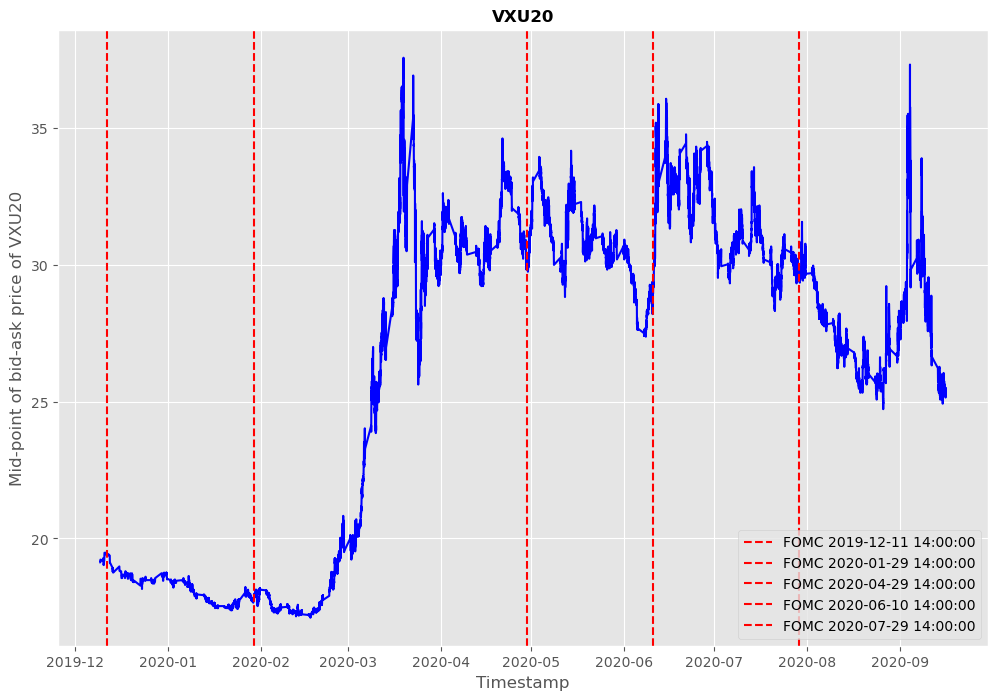

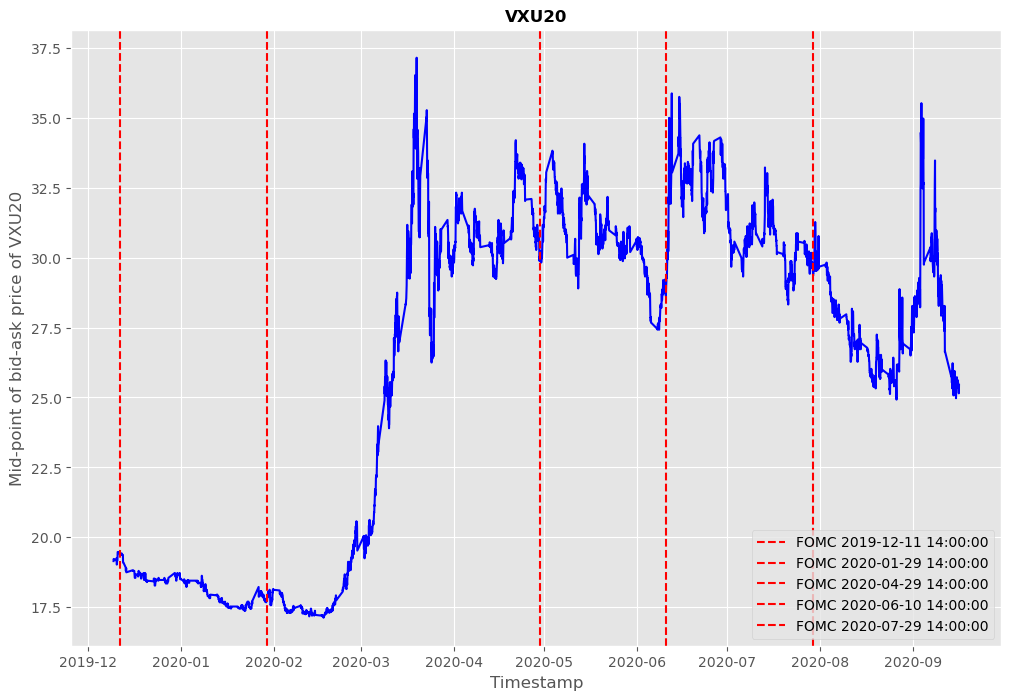

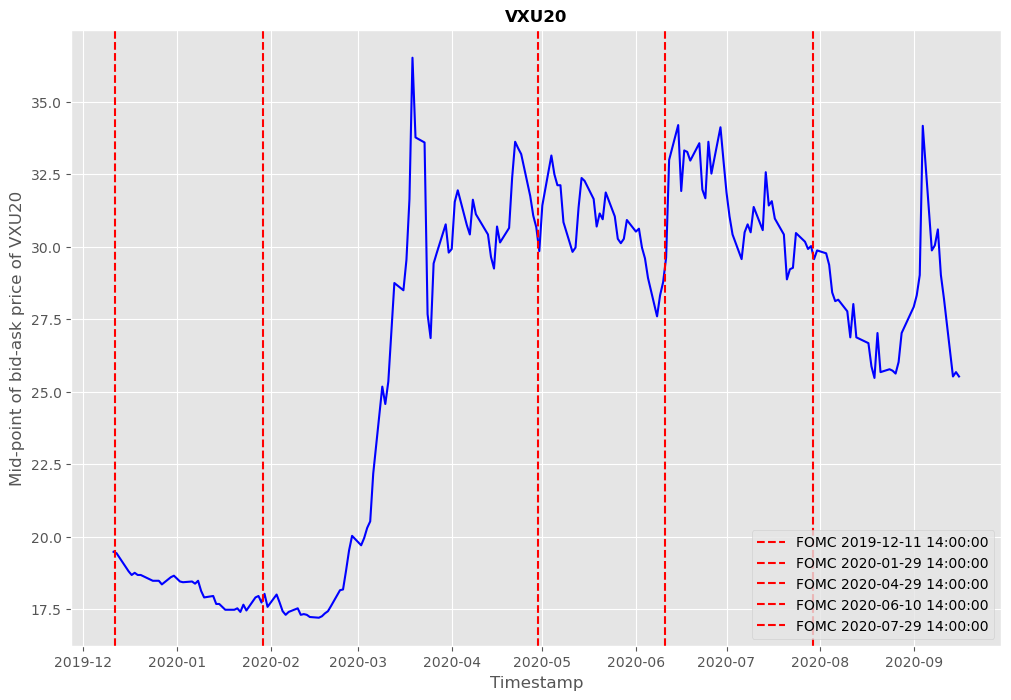

In [5]:
plt_contract('U20', event_df['New_FOMC'])
plt_contract('U20', event_df['New_FOMC'], frequency='h')
plt_contract('U20', event_df['New_FOMC'], frequency='D')

- Between meetings on 2020-01-29 and 2020-04-29, the prices of the VIX futures which expires on September of 2020 increased drastically. This means that people's expectation of the 30 days-volatility at the expiration increases. This could probably be due to the initial reactions to COVID. Subsequently, the volatility of the prices of this contract also increased. 

##### Event time series

- Zooming in on how the time series behaves around each FOMC announcement, we look at 30 days out and 30 days after look through range for each FOMC announcement at a daily frequency

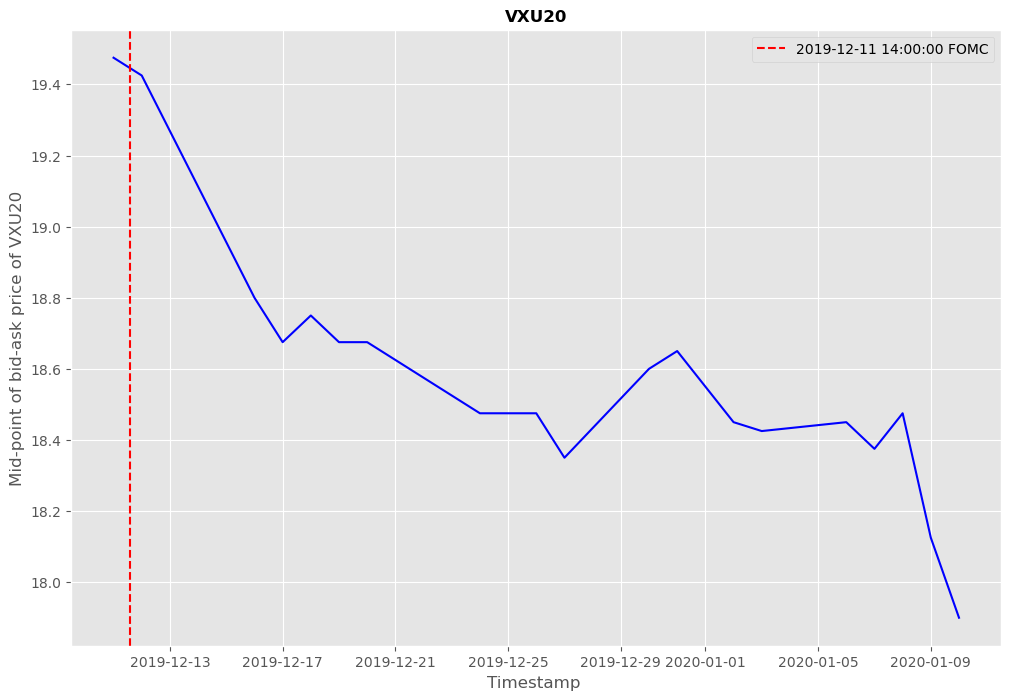

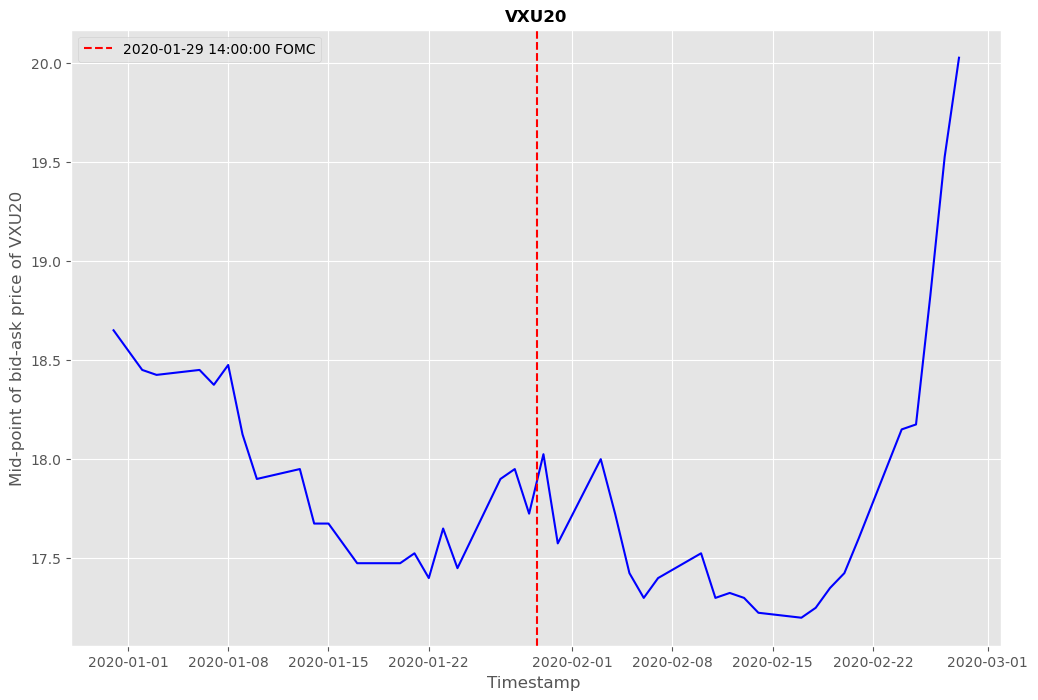

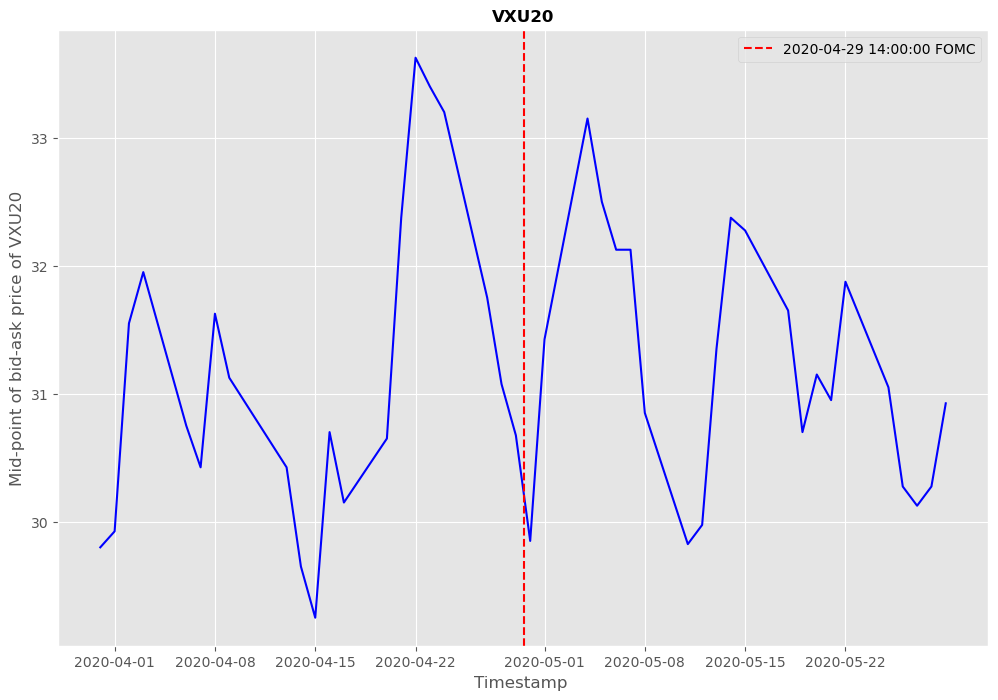

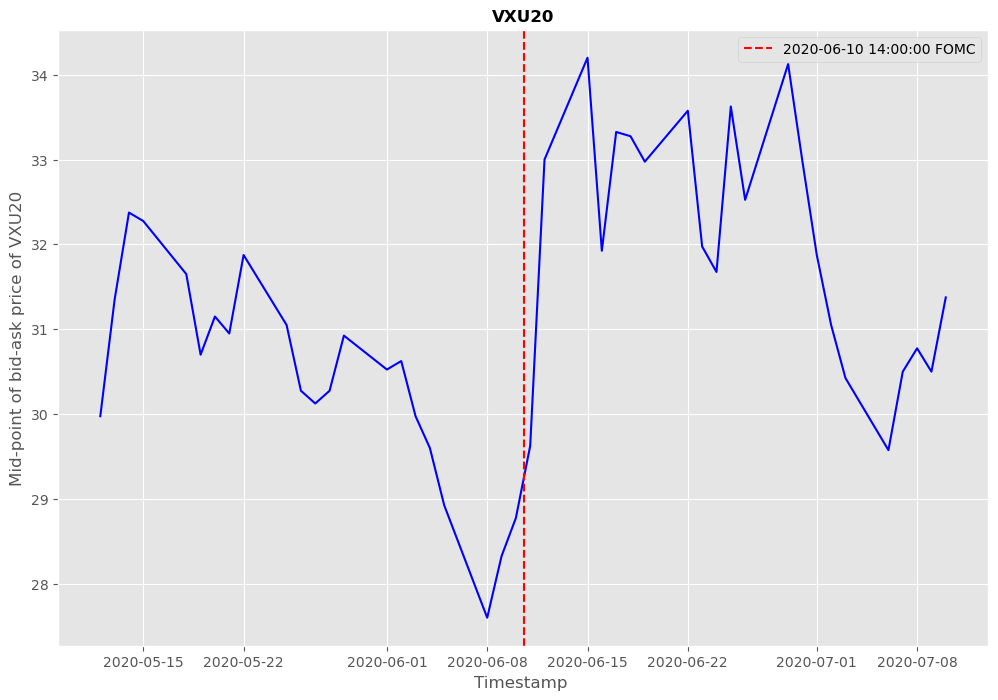

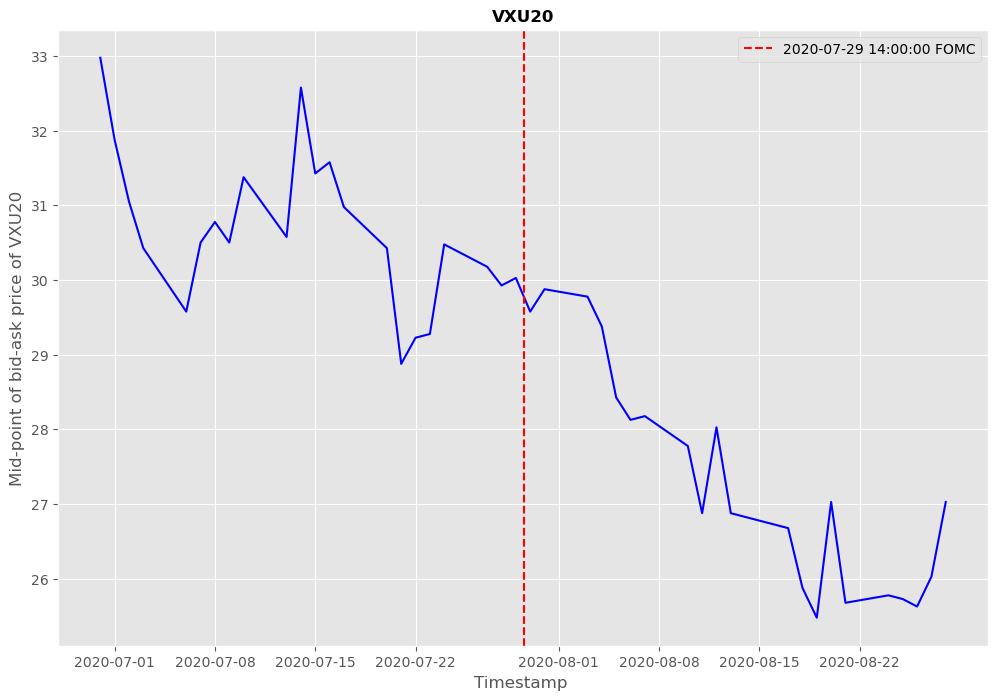

In [6]:
range_ = timedelta(days=30, hours=0, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_contract_event("U20", event, range_, frequency='D')

- For intraday frequency, we set a look through range of 1 days out and 1 days after at the baseline 5 min frequency

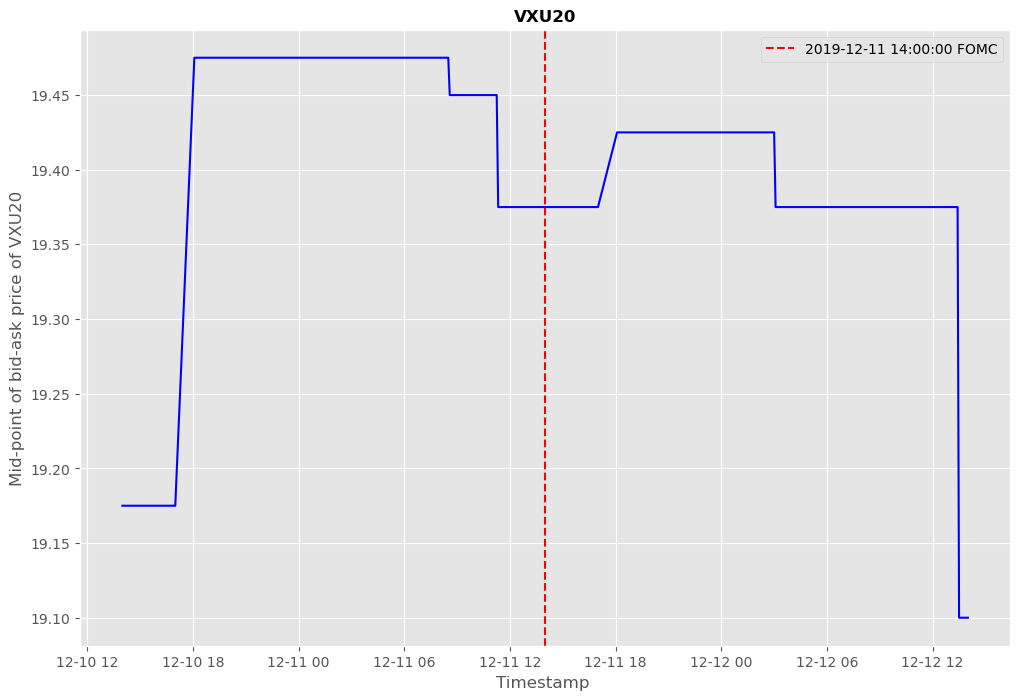

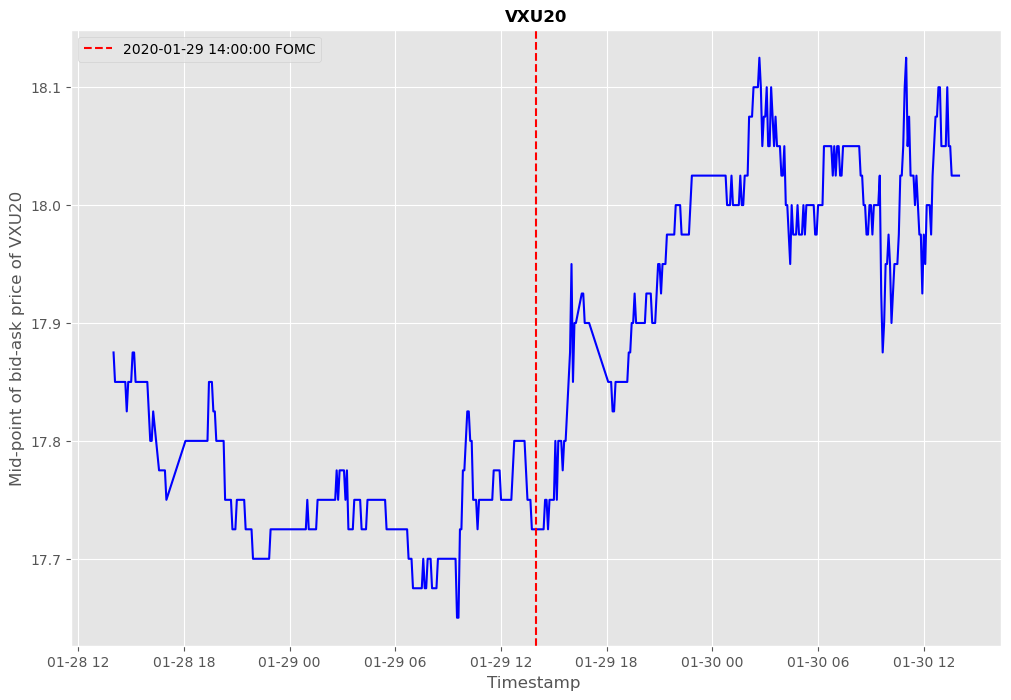

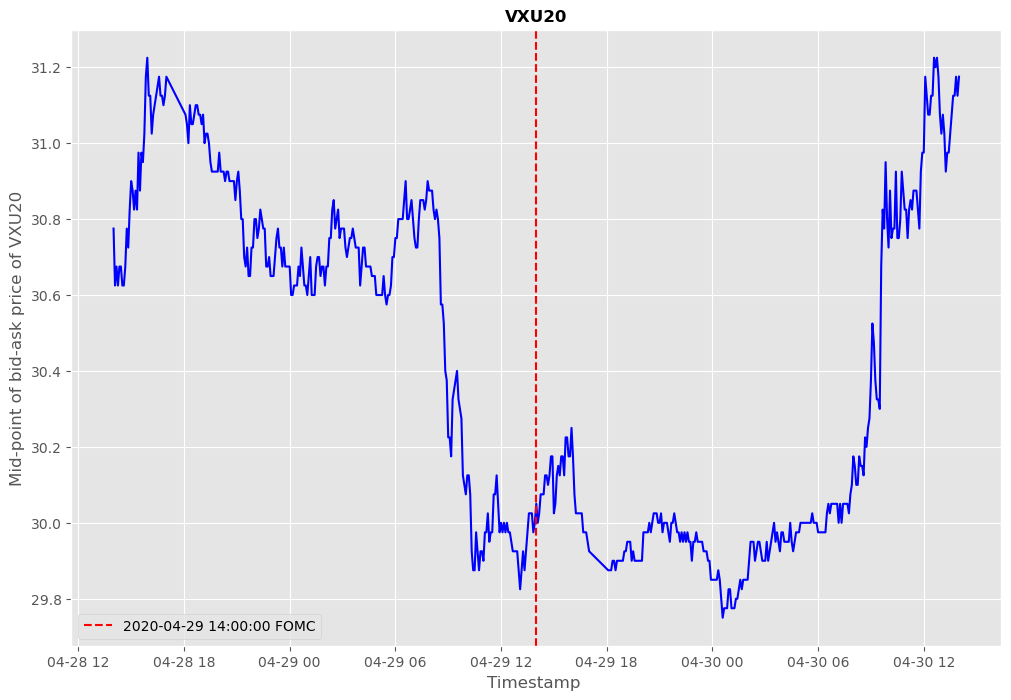

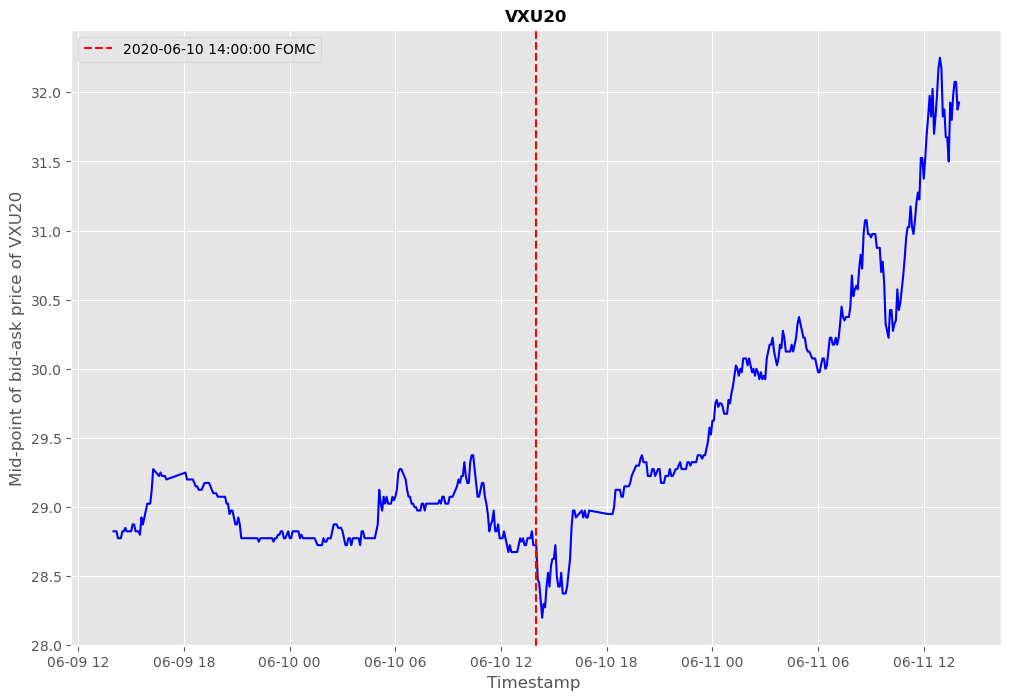

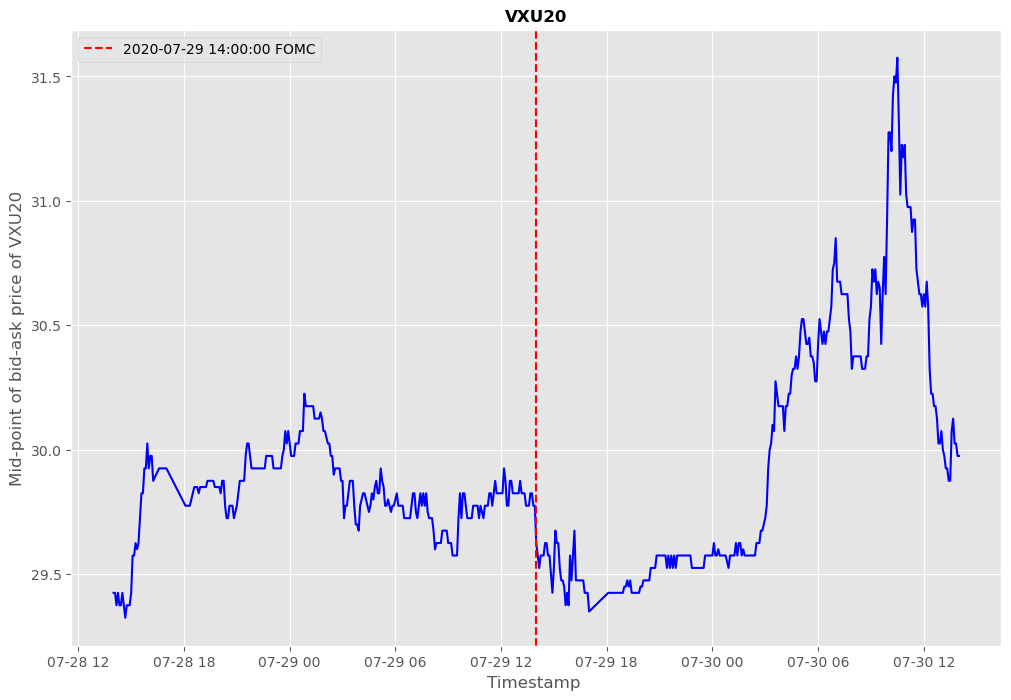

In [7]:
range_ = timedelta(days=1, hours=0, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_contract_event("U20", event, range_)

- And a 3 hours look through range at a 5 min frequency

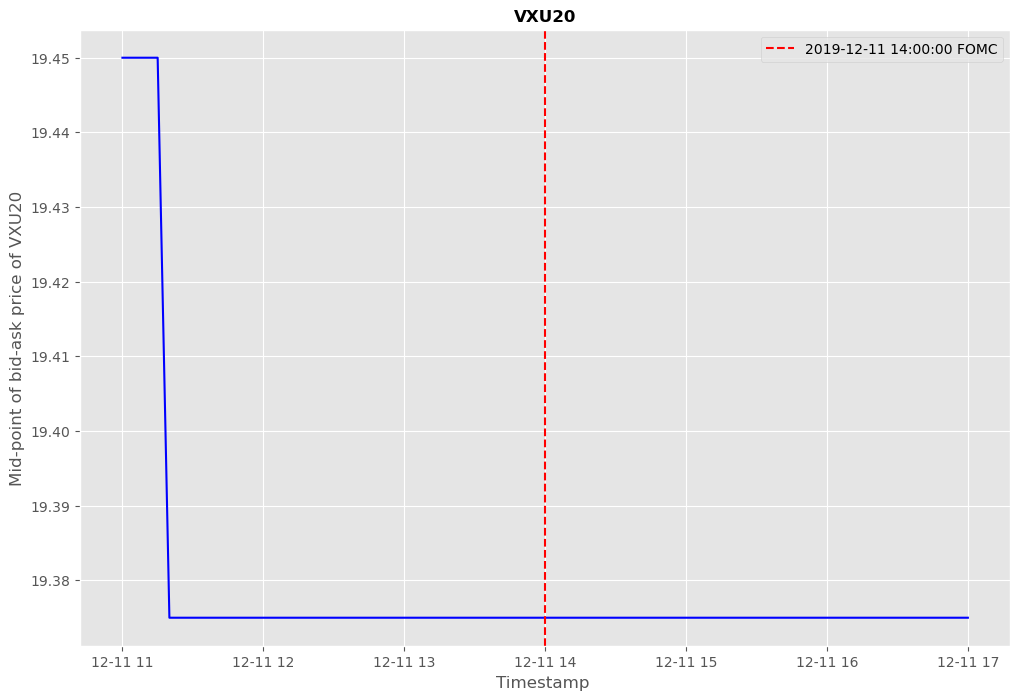

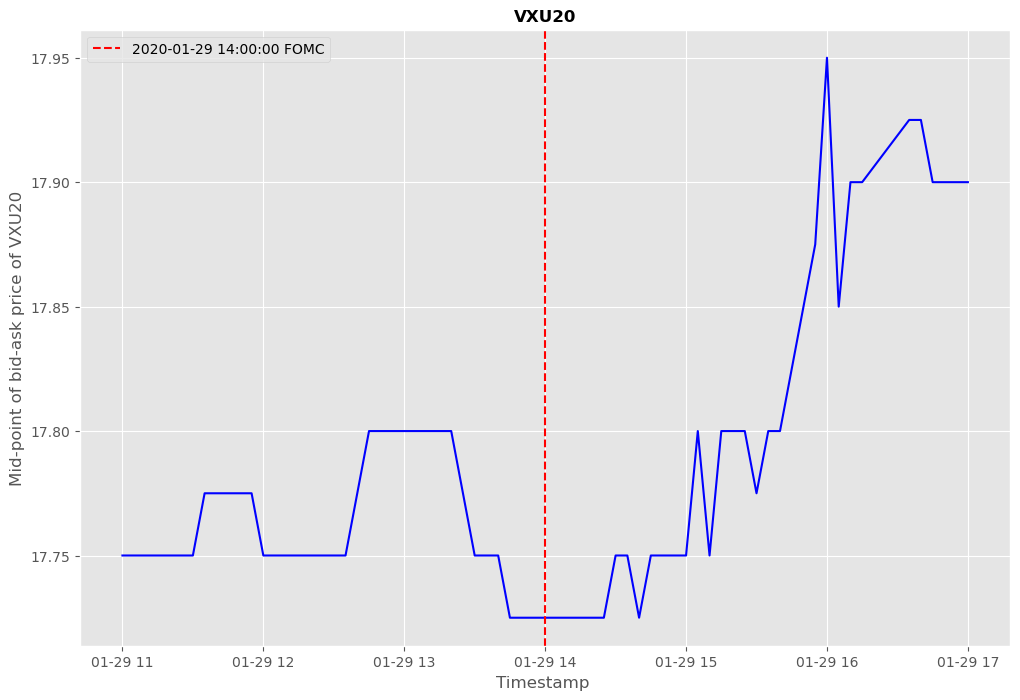

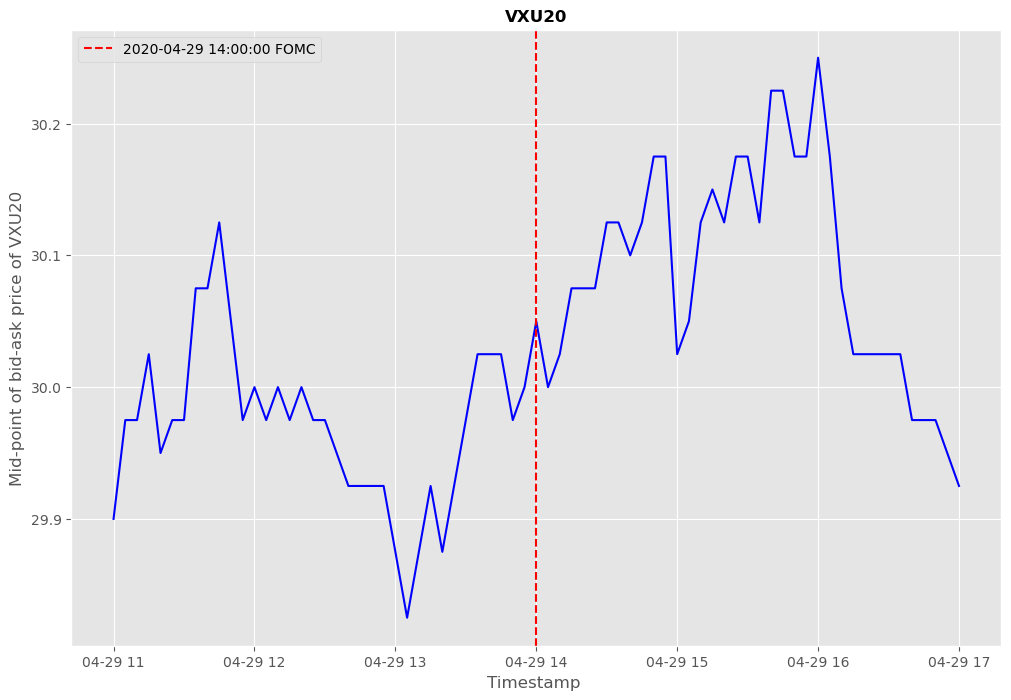

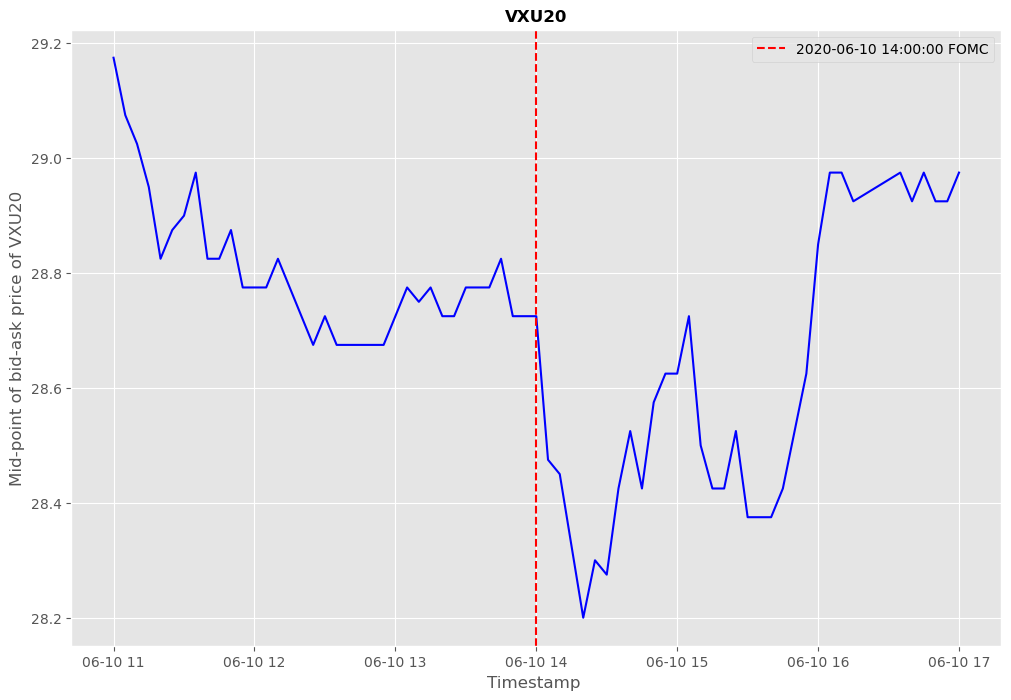

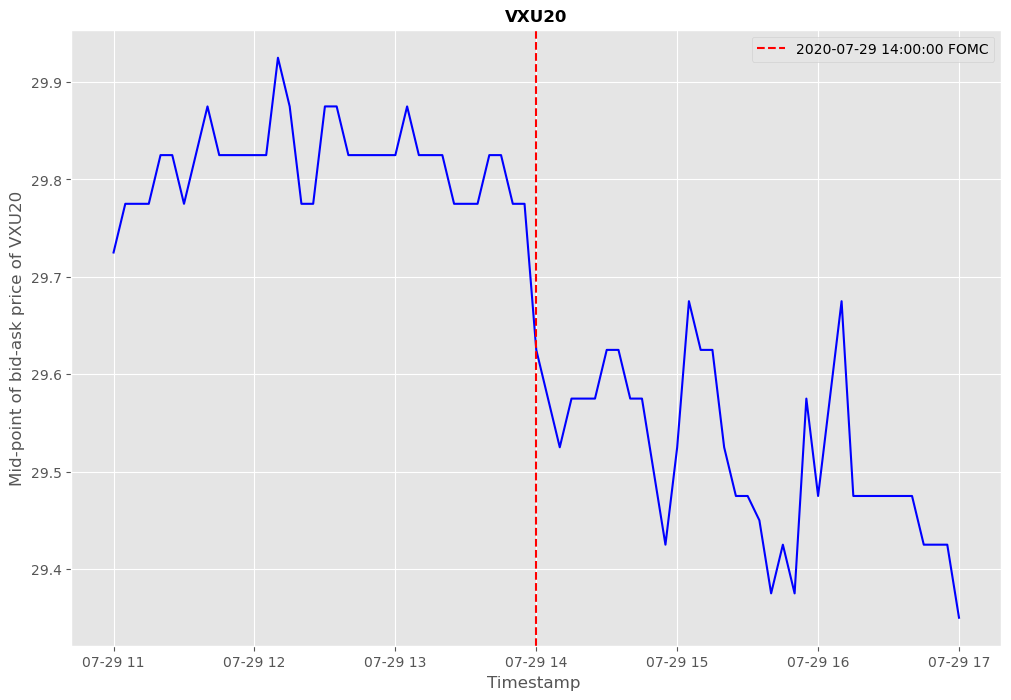

In [8]:
range_ = timedelta(days=0, hours=3, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_contract_event("U20", event, range_)

##### Event distribution

- Taking a look at the distributions before and after the fomc annoucement, first at a 30 day window at a daily frequency

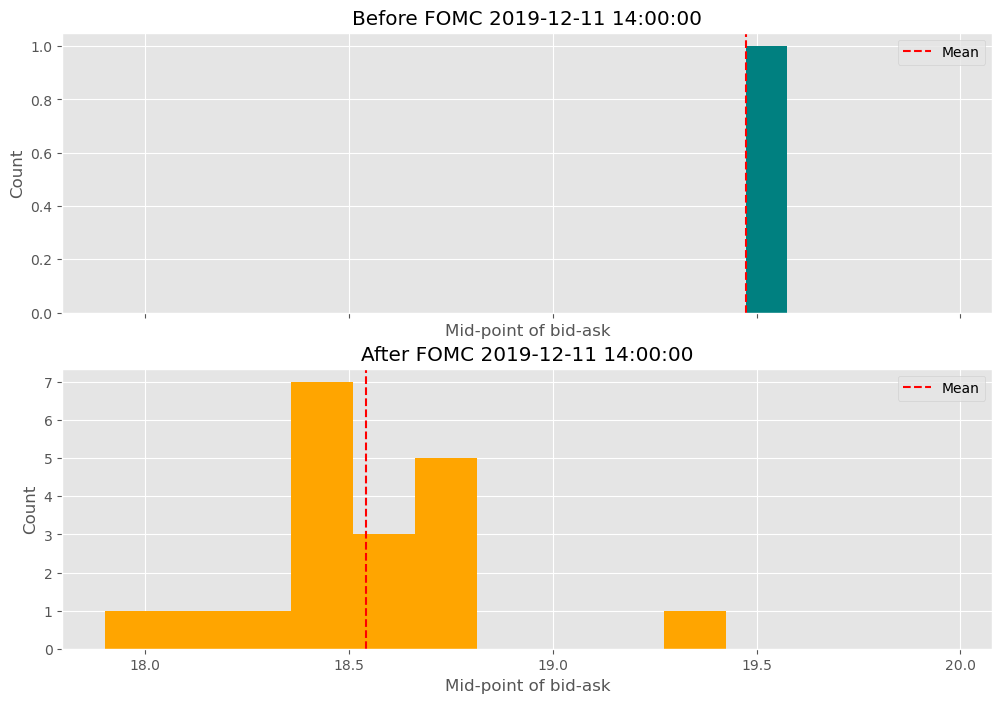

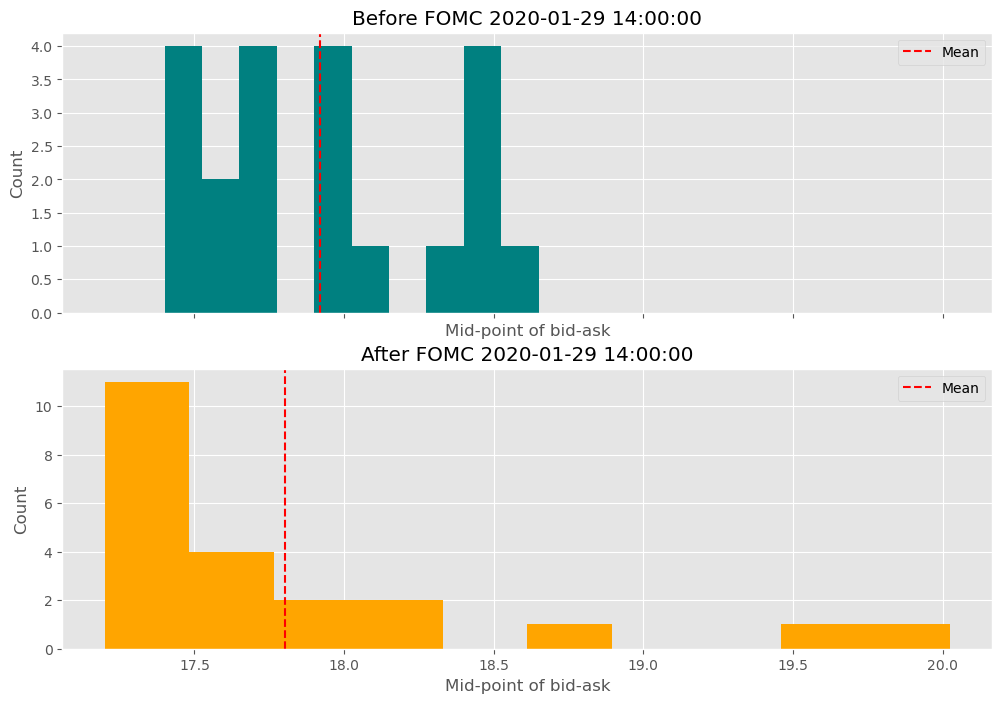

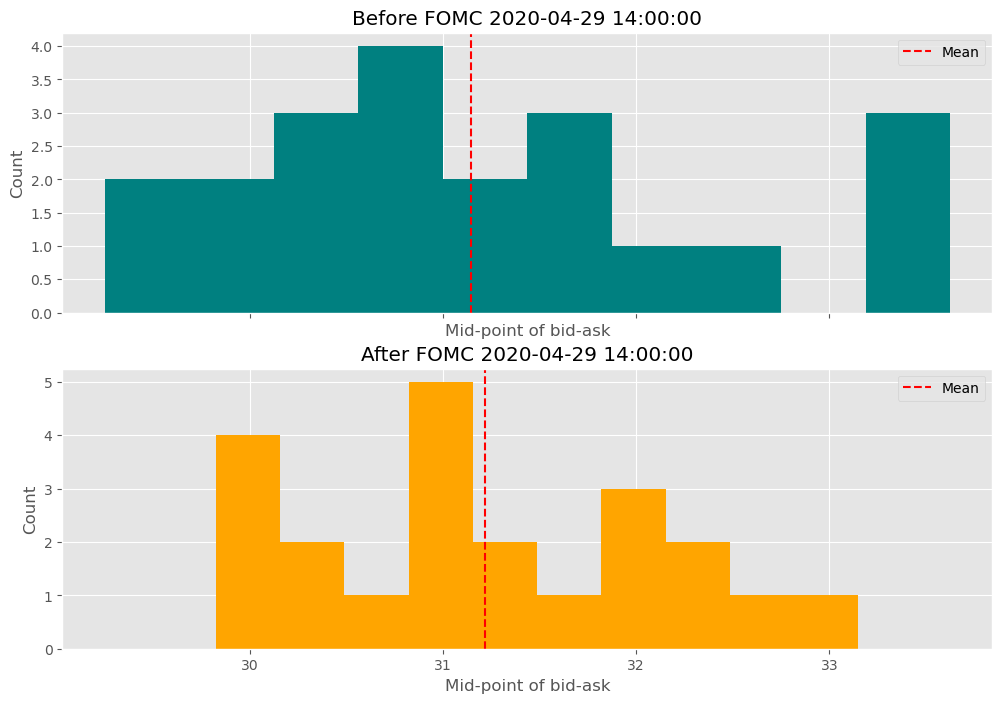

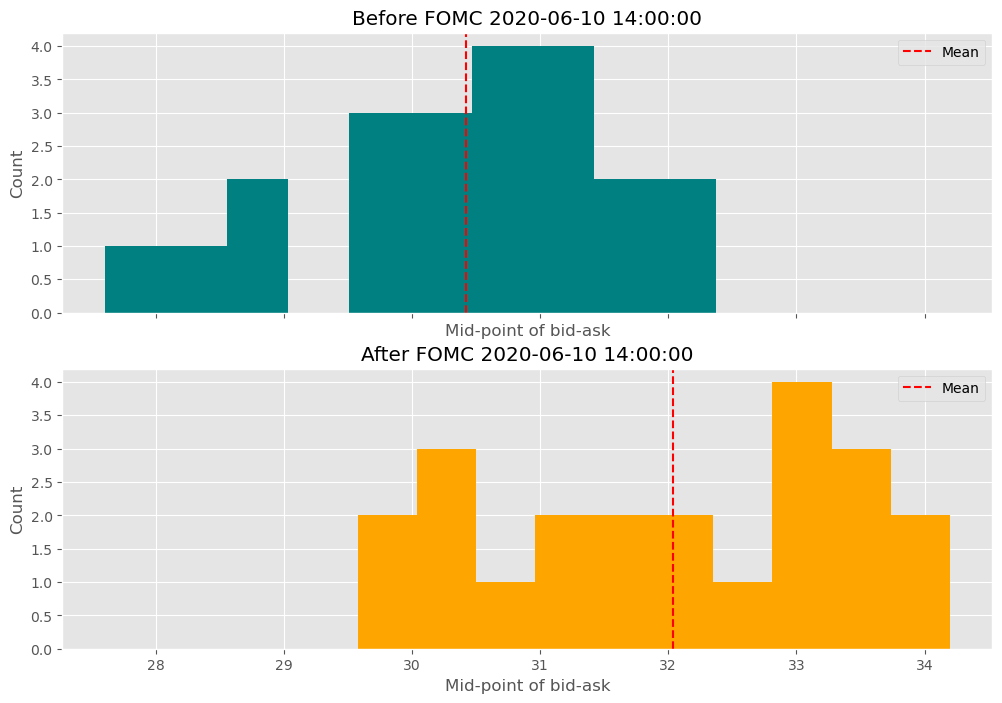

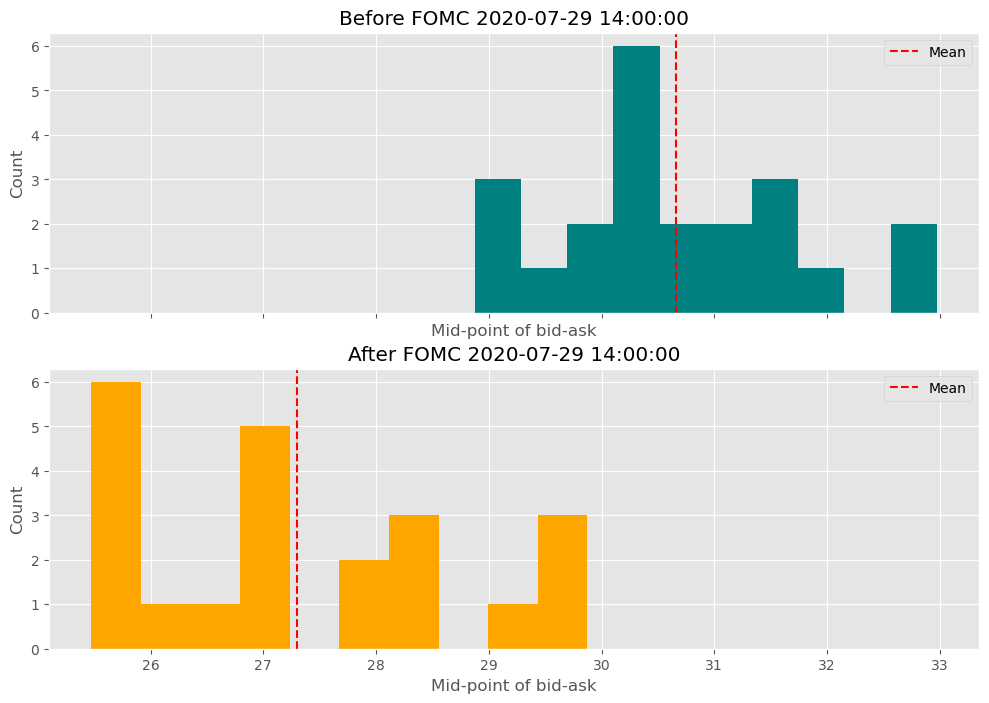

In [9]:
range_ = timedelta(days=30, hours=0, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_event_dist("U20", event, range_, frequency='D')

- 1 day window at a 5 min frequency

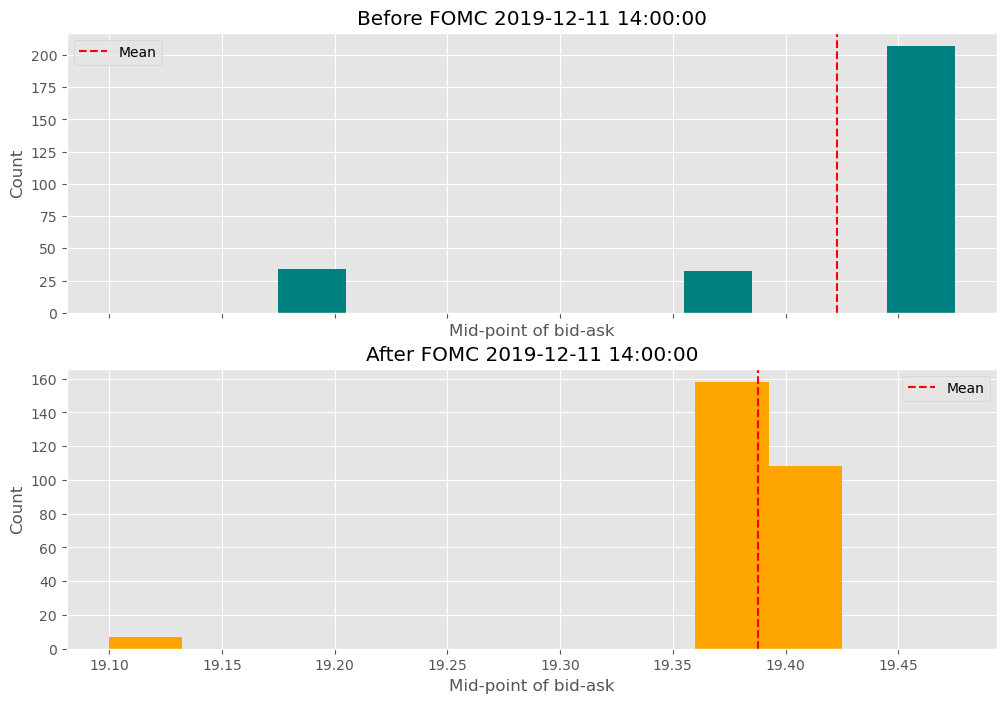

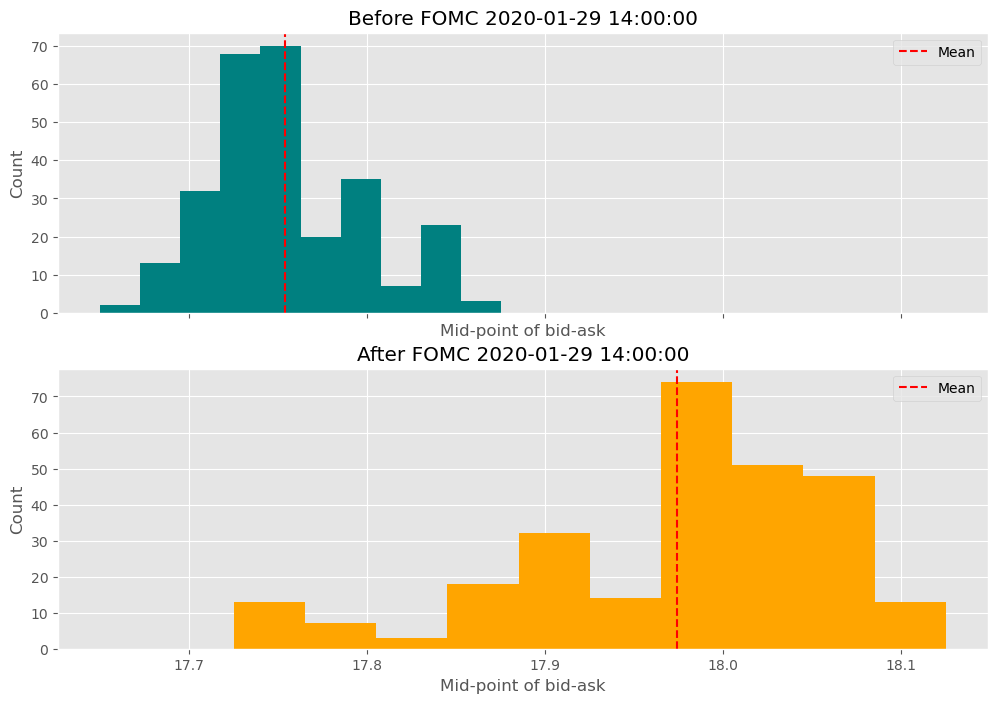

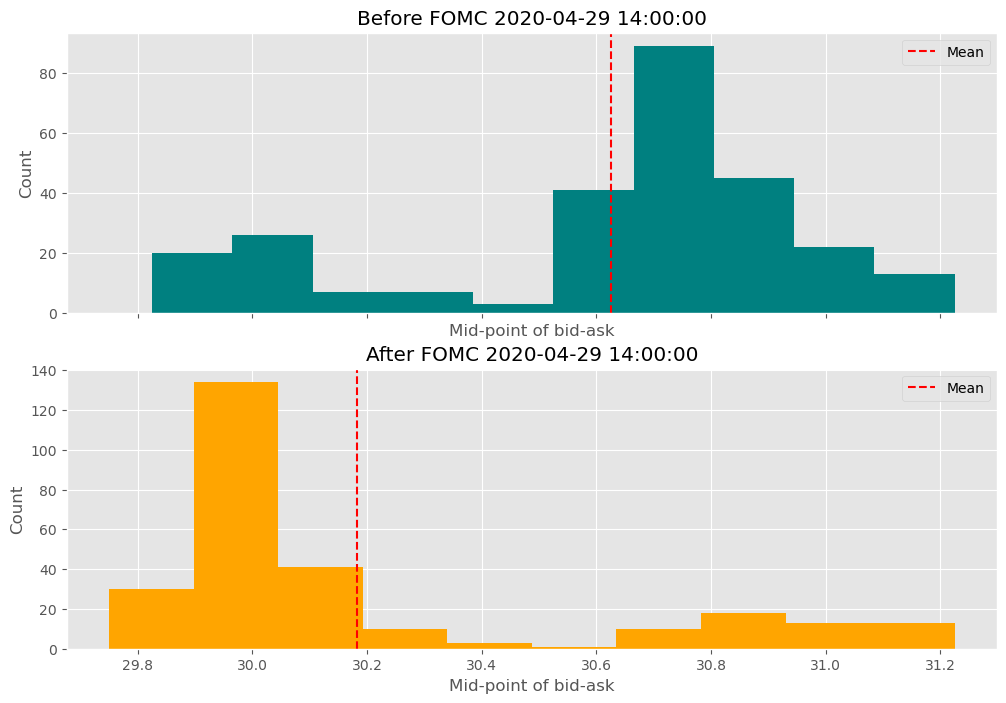

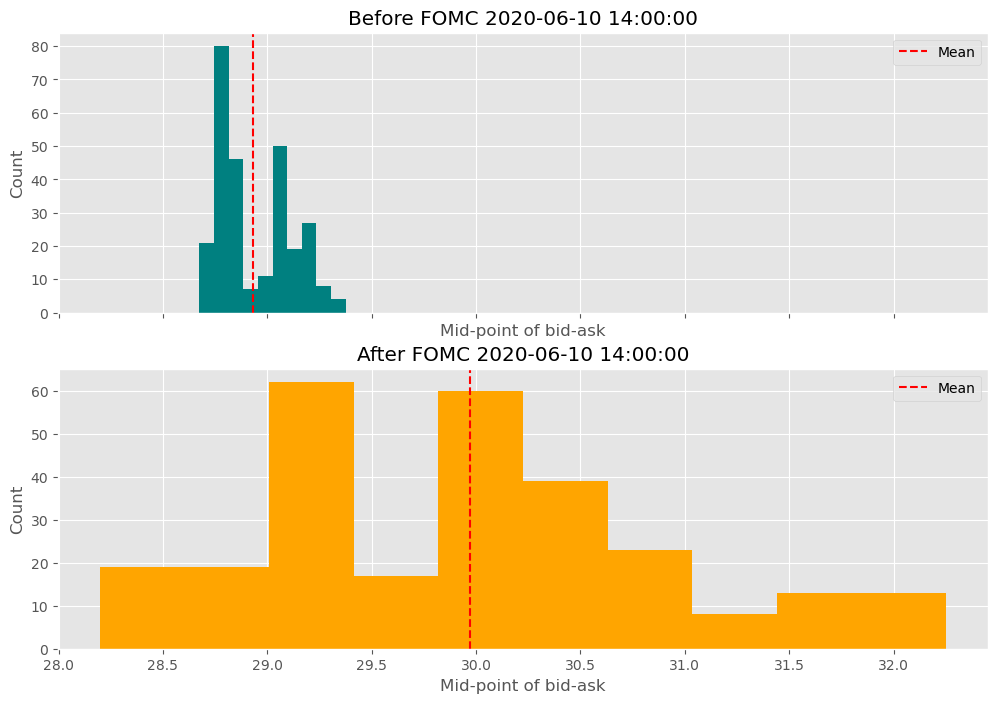

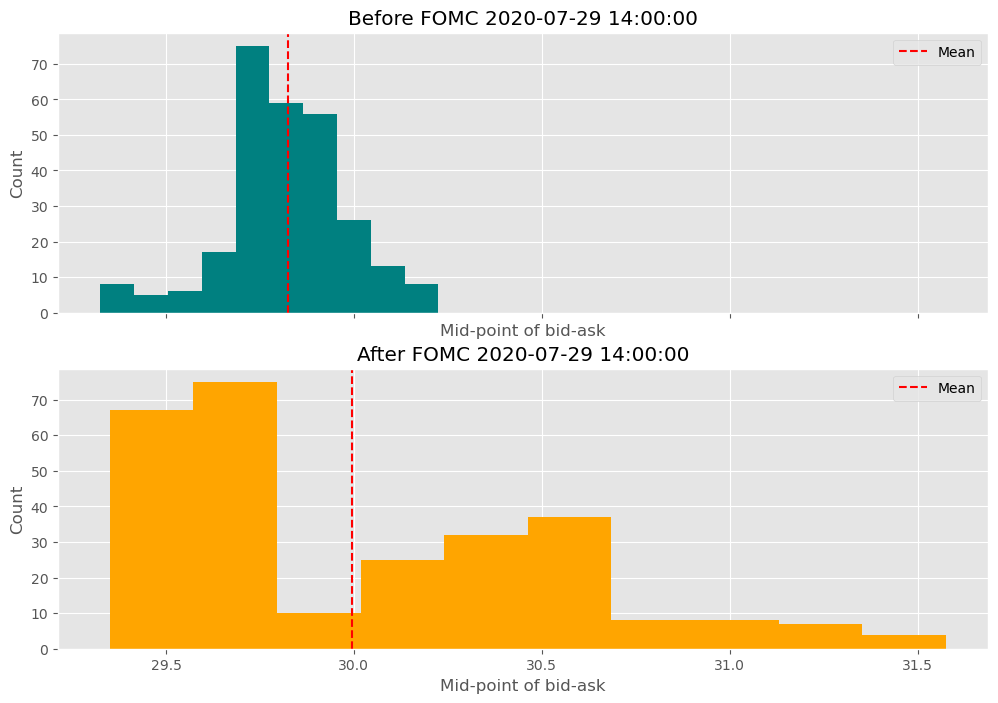

In [10]:
range_ = timedelta(days=1, hours=0, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_event_dist("U20", event, range_)

- 12 hour window at 5 min frequency

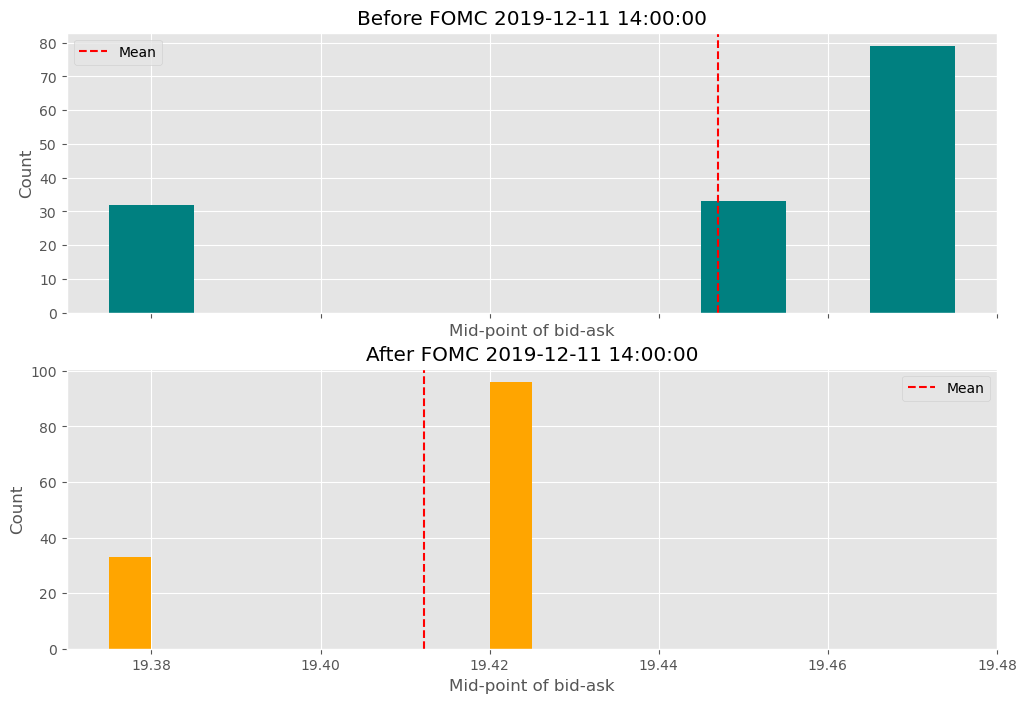

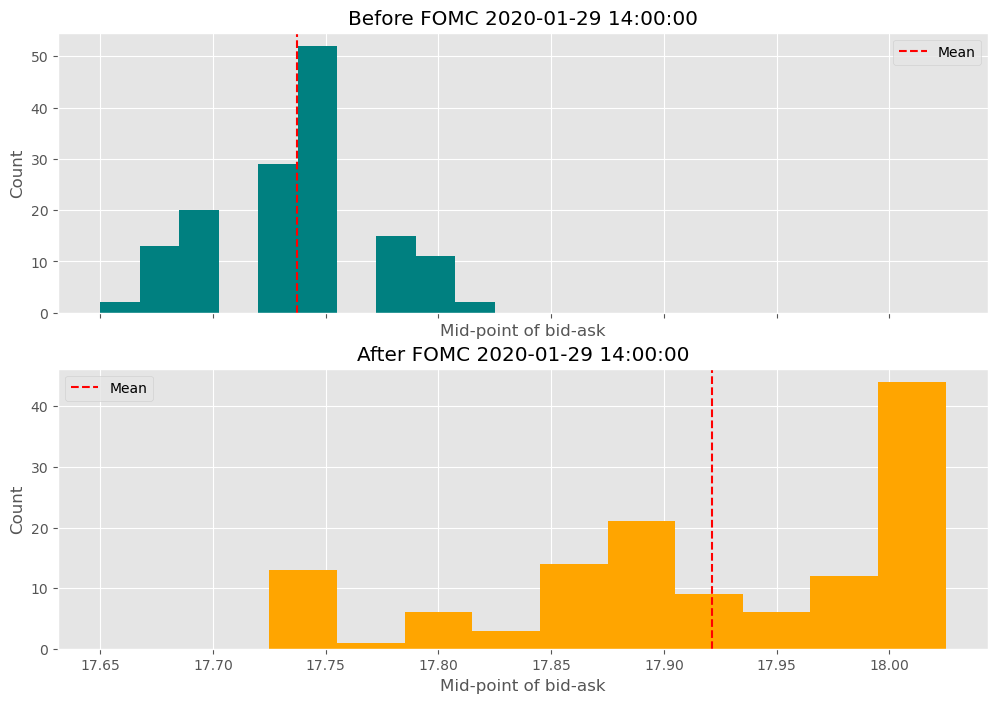

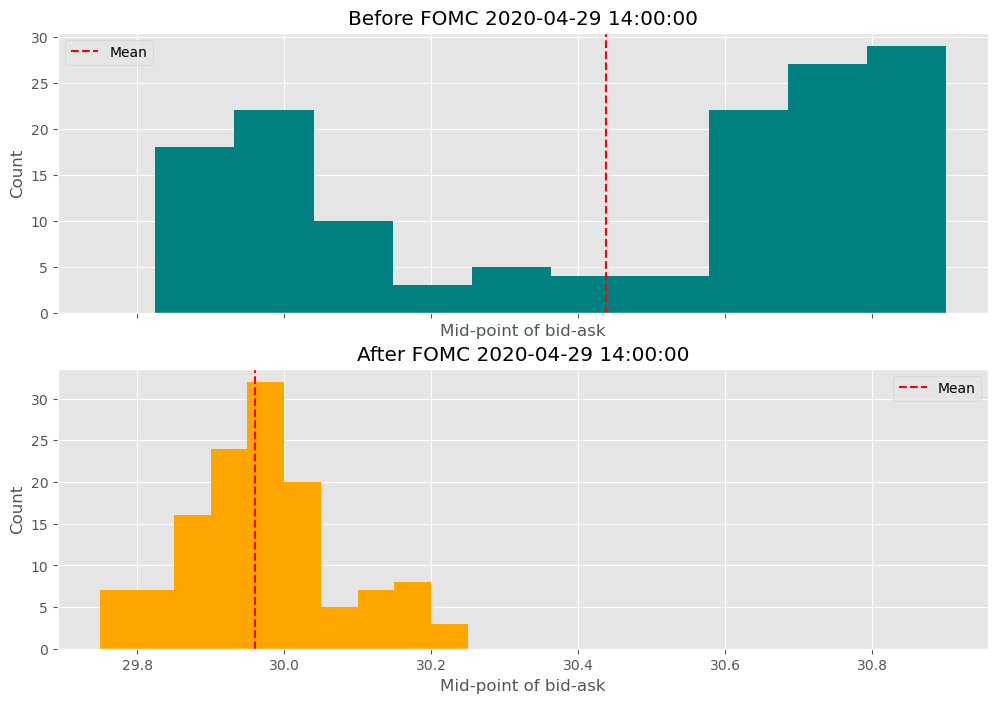

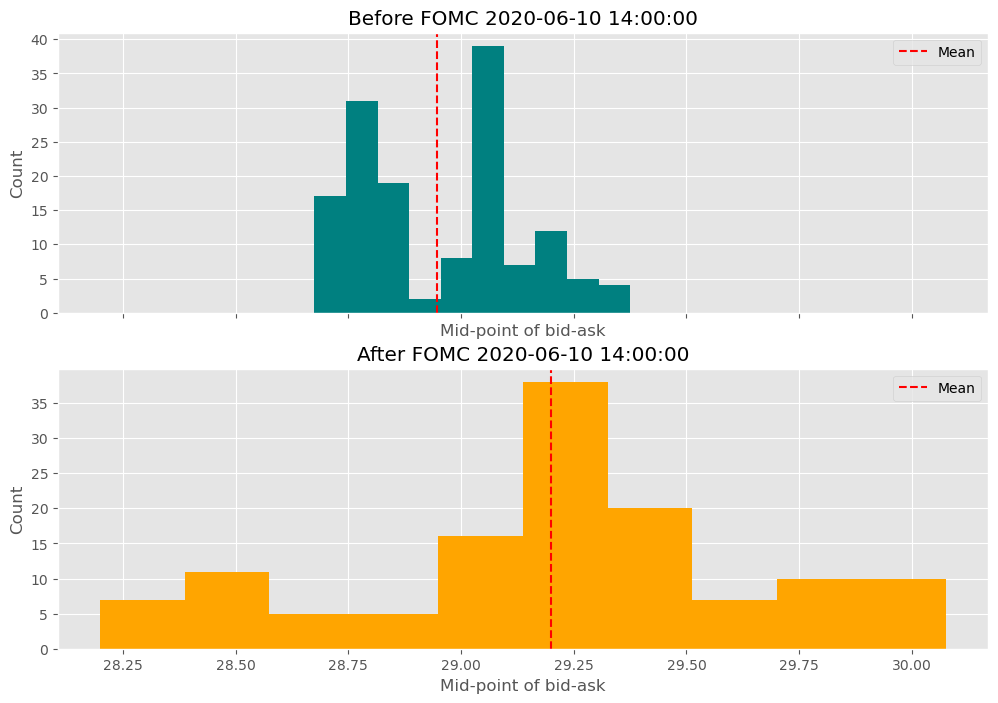

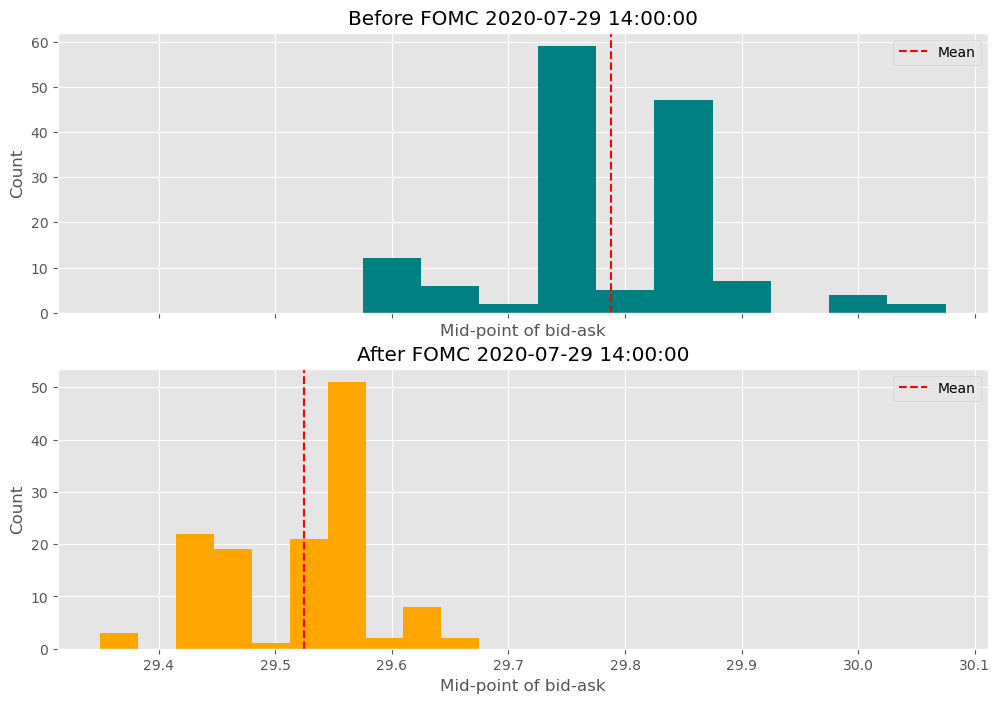

In [11]:
range_ = timedelta(days=0, hours=12, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_event_dist("U20", event, range_)

- 3 hour window at 5 min frequency

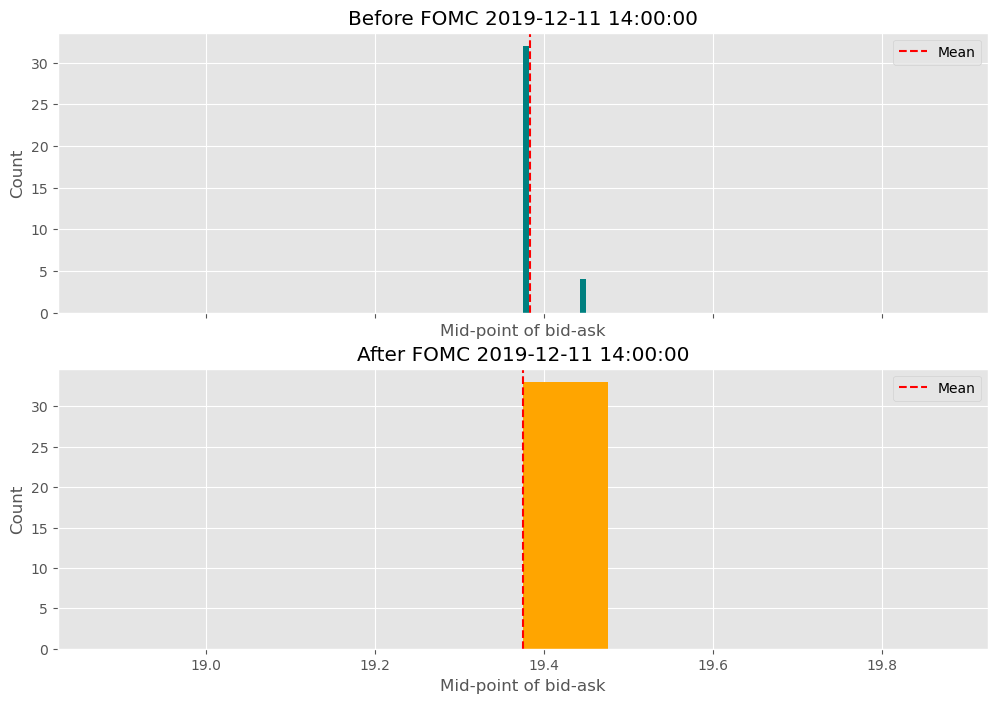

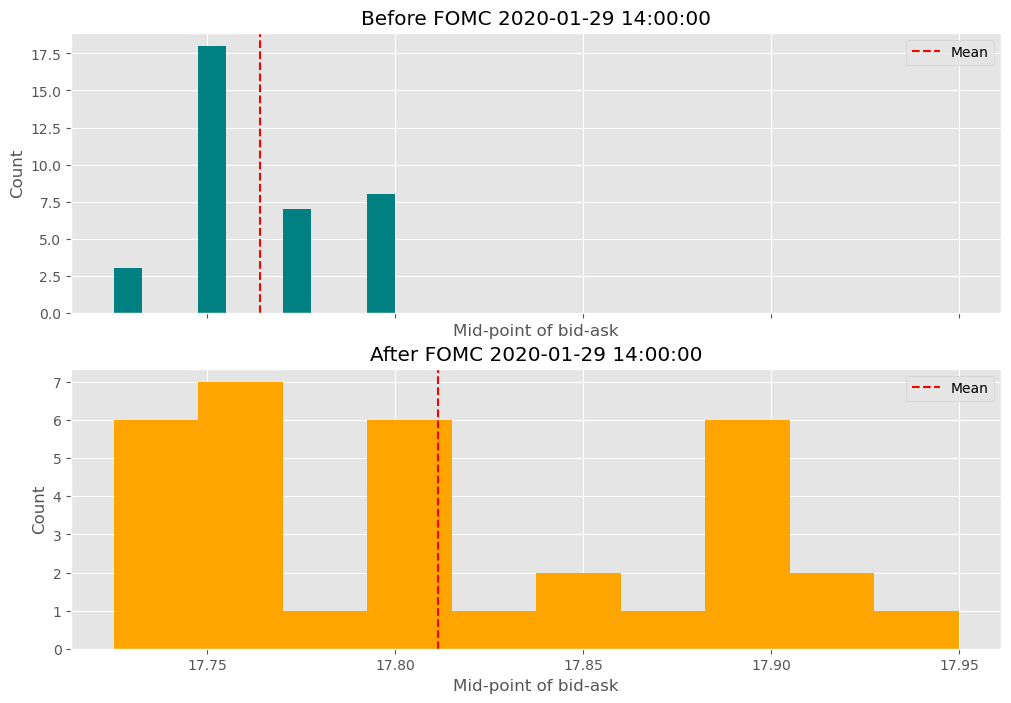

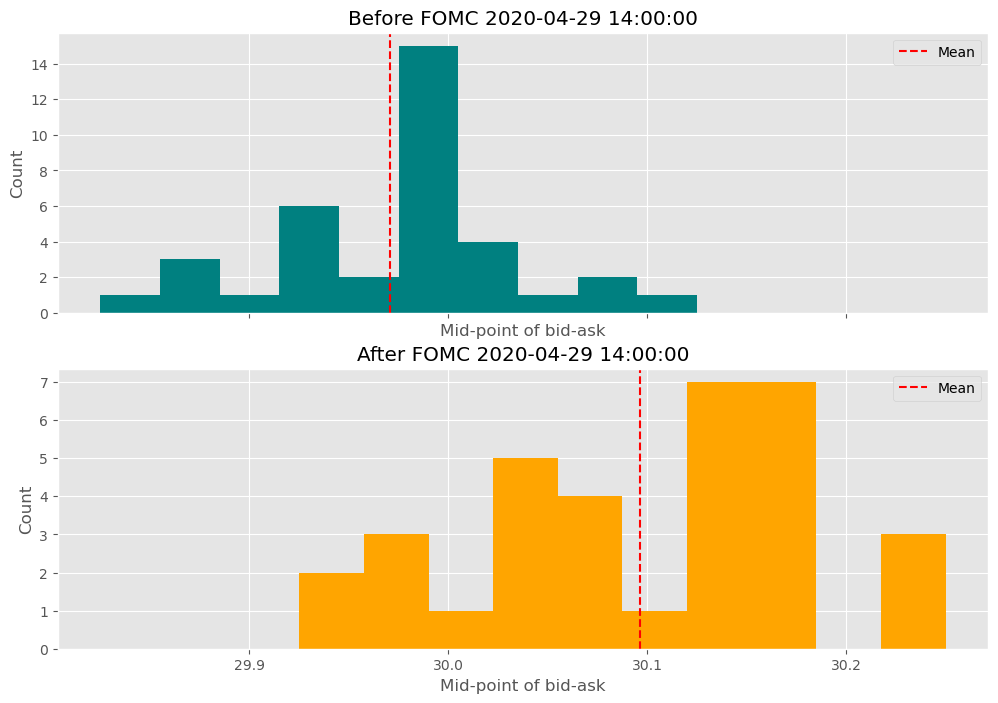

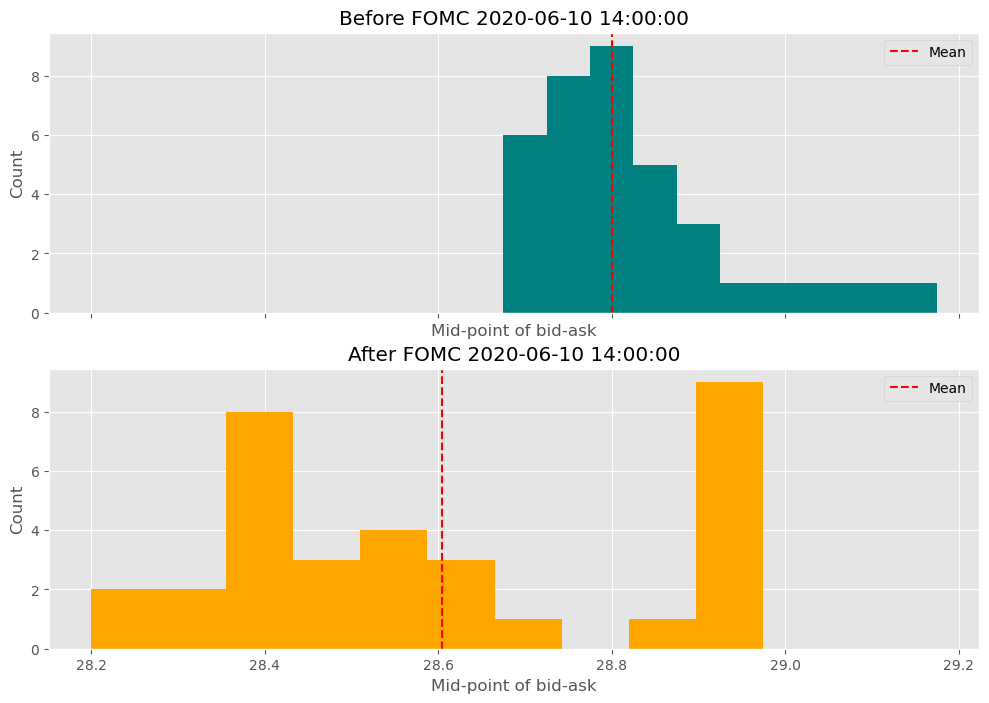

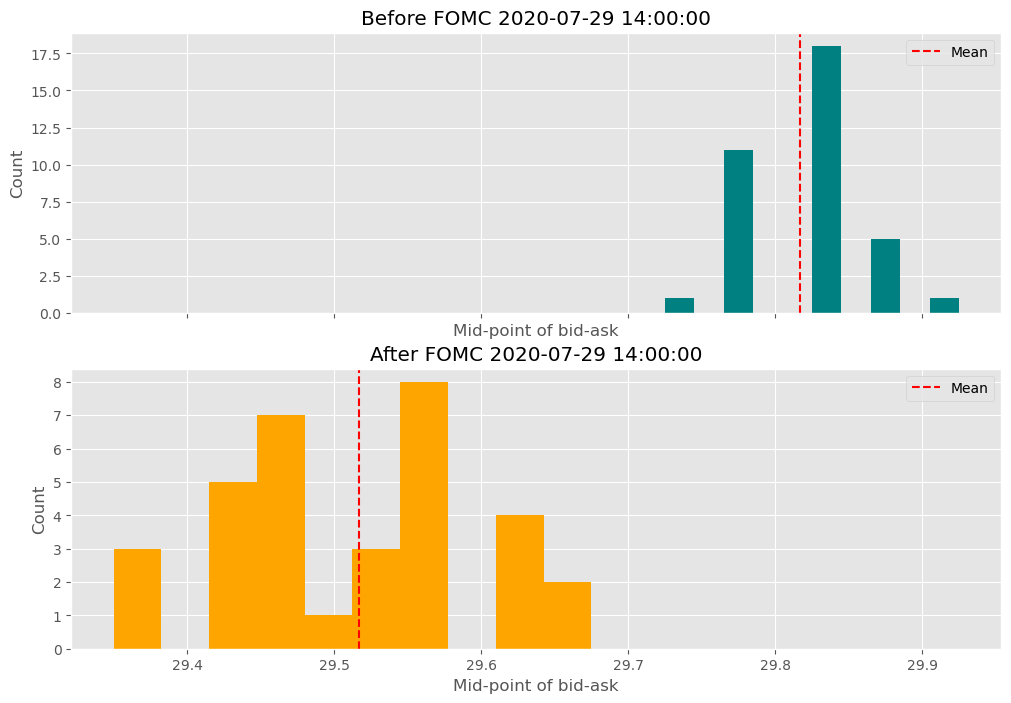

In [12]:
range_ = timedelta(days=0, hours=3, seconds=0)
for event in filter_events('U20', event_df['New_FOMC']):
    plt_event_dist("U20", event, range_)

In [13]:
range_ = timedelta(days=7, hours=0, seconds=0)

# VIX Premium

## Visuals